In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Loading Dataset**

In [10]:
df = pd.read_csv('New_Dataset.csv')

In [11]:
df

,title,text,label
0,Report: It Still Nowhere Near Okay To Act Like...,Report: It Still Nowhere Near Okay To Act Like...,0
1,A Transformational November of Taking a Stand,Leave a reply \nHenry Seltzer – The astrology ...,0
2,Donald Trump Elected 45th President Of The Uni...,Via AP : \nDonald Trump was elected America’s ...,0
3,Democrats are actually more enthusiastic than ...,Rank-and-file Democrats and independents are c...,1
4,Fin de la grève des acteurs à Hollywood après ...,NaN,1
...,...,...,...
9777,What Big Democratic Donors Will Get in Philade...,The Democratic National Committee is offering ...,1
9778,Hillary Clinton To Decide On 2016 Run 'Sometim...,The nation may not have to wait much longer to...,1
9779,"""Il a ensuite fait quelque chose qu’il ne fait...",NaN,1
9780,Jill's dilemma,The president refuses to say he’d hold to the ...,1


In [12]:
df.shape

(9782, 3)

In [13]:
df.head()

,title,text,label
0,Report: It Still Nowhere Near Okay To Act Like...,Report: It Still Nowhere Near Okay To Act Like...,0
1,A Transformational November of Taking a Stand,Leave a reply \nHenry Seltzer – The astrology ...,0
2,Donald Trump Elected 45th President Of The Uni...,Via AP : \nDonald Trump was elected America’s ...,0
3,Democrats are actually more enthusiastic than ...,Rank-and-file Democrats and independents are c...,1
4,Fin de la grève des acteurs à Hollywood après ...,NaN,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9782 entries, 0 to 9781
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9172 non-null   object
 1   text    7099 non-null   object
 2   label   9782 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 229.4+ KB


In [15]:
df.describe()

,label
count,9782.000000
mean,0.526273
std,0.499335
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


**Data Cleaning and Feature Engineering**

In [16]:
# checking missing values
df.isnull().sum()

title     610
text     2683
label       0
dtype: int64

In [17]:
# missing values in terms of percentage
(df.isnull().sum())/(df.shape[0])*100

title     6.235944
text     27.427929
label     0.000000
dtype: float64

In [18]:
df['title'].fillna(value="missing",inplace=True)
df['text'].fillna(value="missing",inplace=True)

In [19]:
# adding a new column of combined(title+text)
df['combined']=df['text']+df['title']

**EDA**

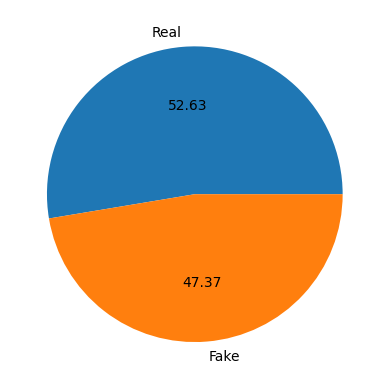

In [20]:
plt.pie(df['label'].value_counts(),labels=['Real','Fake'],autopct="%0.2f")
plt.show()

so here we can see that the dataset is not biased

In [21]:
# for counting no of characters

def num_characters(text):
    if pd.notna(text):  # Check if the value is not NaN
        return len(text)
    else:
        return 0

# for counting no of words

def num_words(text):
    if pd.notna(text):  # Check if the value is not NaN
        return len(nltk.word_tokenize(text))
    else:
        return 0

# for counting no of sentences

def num_sentences(text):
    if pd.notna(text):  # Check if the value is not NaN
        return len(nltk.sent_tokenize(text))
    else:
        return 0

calculating number of characters, words,sententce in title column

In [22]:
df['num_characters_title'] = df['title'].apply(num_characters)
df['num_words_title'] = df['title'].apply(num_words)
df['num_sentences_title'] = df['title'].apply(num_sentences)

In [23]:
# for fake news
df[df['label'] == 0][['num_characters_title','num_words_title']].describe()

,num_characters_title,num_words_title
count,4634.000000,4634.000000
mean,64.675011,12.003669
std,50.622477,9.923329
min,1.000000,0.000000
25%,36.250000,7.000000
50%,62.000000,11.000000
75%,83.000000,15.000000
max,692.000000,143.000000


In [24]:
# for real news
df[df['label']==1][['num_characters_title','num_words_title']].describe()

,num_characters_title,num_words_title
count,5148.000000,5148.000000
mean,71.253497,12.951437
std,25.237793,5.044043
min,9.000000,2.000000
25%,53.000000,9.000000
50%,69.000000,12.000000
75%,86.000000,16.000000
max,228.000000,42.000000


plotting to see relations of num_char,num_words,num_sentence between fake and real news (in title)

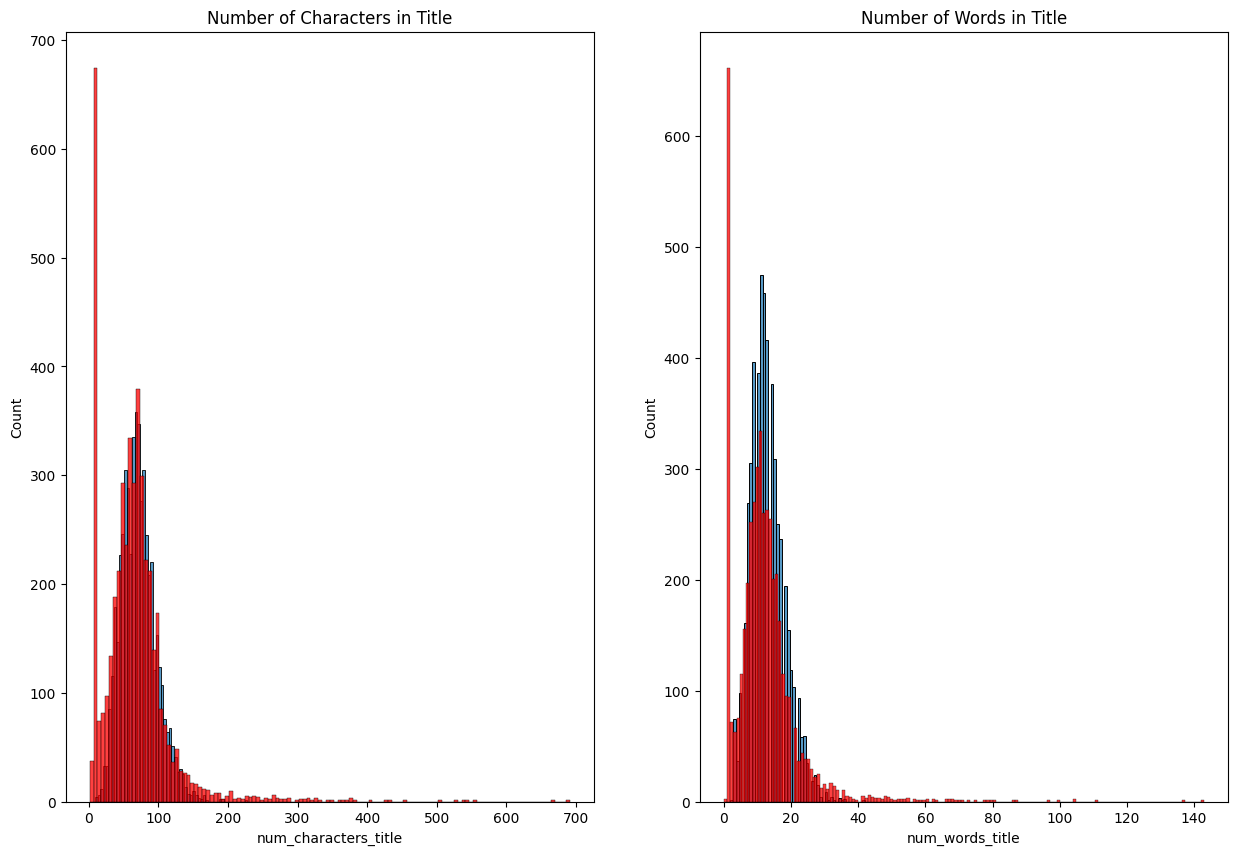

In [25]:
plt.figure(figsize=(15, 10))

# Plot for 'num_characters_title'
plt.subplot(1, 2, 1)
sns.histplot(df[df['label'] == 1]['num_characters_title'])
sns.histplot(df[df['label'] == 0]['num_characters_title'], color='red')
plt.title('Number of Characters in Title')

# Plot for 'num_words_title'
plt.subplot(1, 2, 2)
sns.histplot(df[df['label'] == 1]['num_words_title'])
sns.histplot(df[df['label'] == 0]['num_words_title'], color='red')
plt.title('Number of Words in Title')

plt.show()

here we can see in both cases(num_char and num_words) for real news it is lower than fake news

**calculating number of characters, words,sententce in text column(same as previous)**

In [26]:
df['num_characters_text'] = df['text'].apply(num_characters)
df['num_words_text'] = df['text'].apply(num_words)
df['num_sentences_text'] = df['text'].apply(num_sentences)

In [27]:
# for fake news
df[df['label'] == 0][['num_characters_text','num_words_text']].describe()

,num_characters_text,num_words_text
count,4634.000000,4634.000000
mean,2830.151273,538.398576
std,4426.958730,846.562806
min,1.000000,0.000000
25%,45.000000,9.000000
50%,1390.000000,263.000000
75%,3632.250000,688.000000
max,32727.000000,7165.000000


In [28]:
# for real news
df[df['label'] == 1][['num_characters_text','num_words_text']].describe()

,num_characters_text,num_words_text
count,5148.000000,5148.000000
mean,3183.024864,611.484654
std,3943.494252,763.521607
min,3.000000,1.000000
25%,7.000000,1.000000
50%,2145.000000,409.500000
75%,5316.500000,1015.000000
max,32509.000000,6467.000000


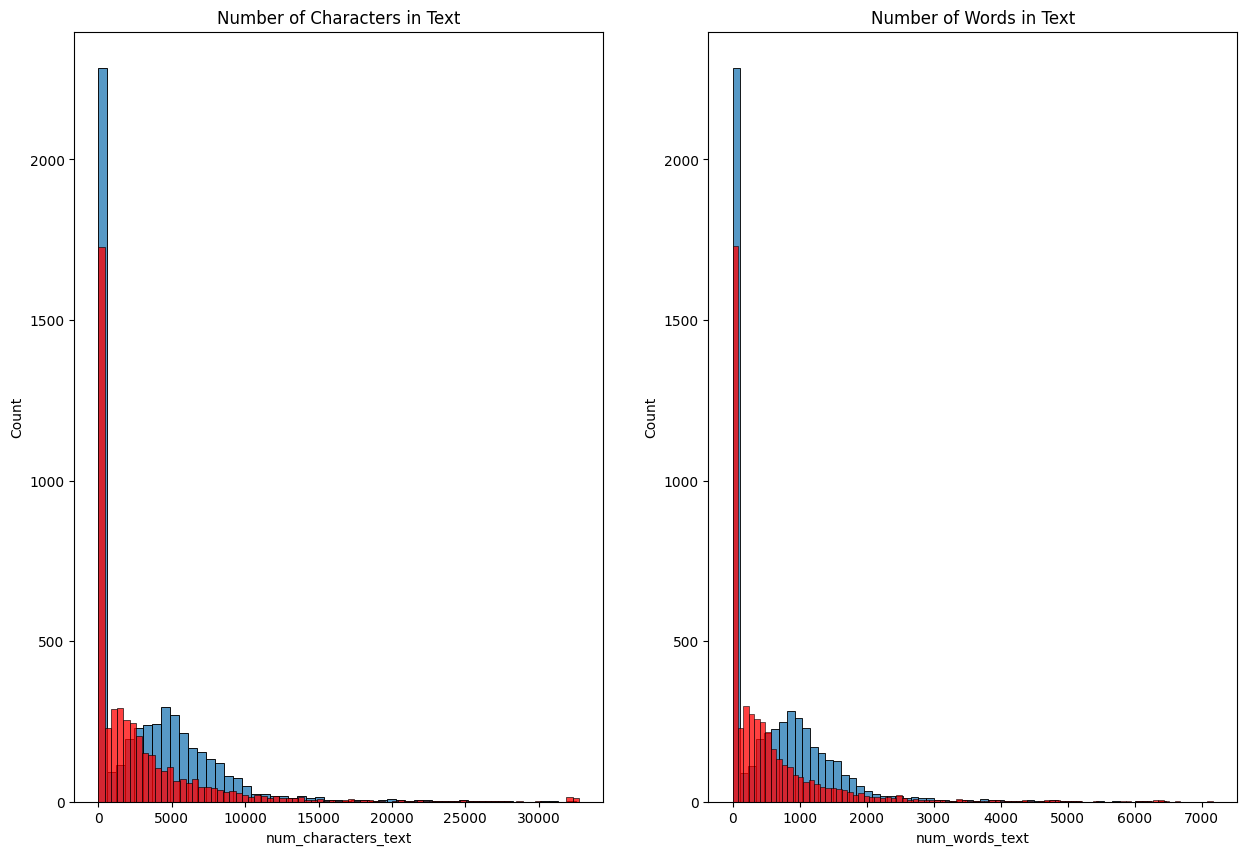

In [29]:
plt.figure(figsize=(15, 10))

# Plot for 'num_characters_text'
plt.subplot(1, 2, 1)
sns.histplot(df[df['label'] == 1]['num_characters_text'])
sns.histplot(df[df['label'] == 0]['num_characters_text'], color='red')
plt.title('Number of Characters in Text')

# Plot for 'num_words_text'
plt.subplot(1, 2, 2)
sns.histplot(df[df['label'] == 1]['num_words_text'])
sns.histplot(df[df['label'] == 0]['num_words_text'], color='red')
plt.title('Number of Words in Text')

plt.show()

**calculating number of characters, words,sententce in combined column(same as previous)**

In [30]:
df['num_characters_combined'] = df['combined'].apply(num_characters)
df['num_words_combined'] = df['combined'].apply(num_words)
df['num_sentences_combined'] = df['combined'].apply(num_sentences)

In [31]:
# for fake news
df[df['label'] == 0][['num_characters_combined','num_words_combined']].describe()

,num_characters_combined,num_words_combined
count,4634.000000,4634.000000
mean,2894.826284,549.713423
std,4429.930686,846.943134
min,8.000000,1.000000
25%,139.250000,27.000000
50%,1465.000000,277.000000
75%,3699.250000,698.750000
max,32769.000000,7178.000000


In [32]:
# for real news
df[df['label'] == 1][['num_characters_combined','num_words_combined']].describe()

,num_characters_combined,num_words_combined
count,5148.000000,5148.000000
mean,3254.278361,623.139472
std,3937.364320,762.437738
min,18.000000,3.000000
25%,105.000000,18.000000
50%,2202.000000,418.500000
75%,5384.000000,1024.000000
max,32537.000000,6480.000000


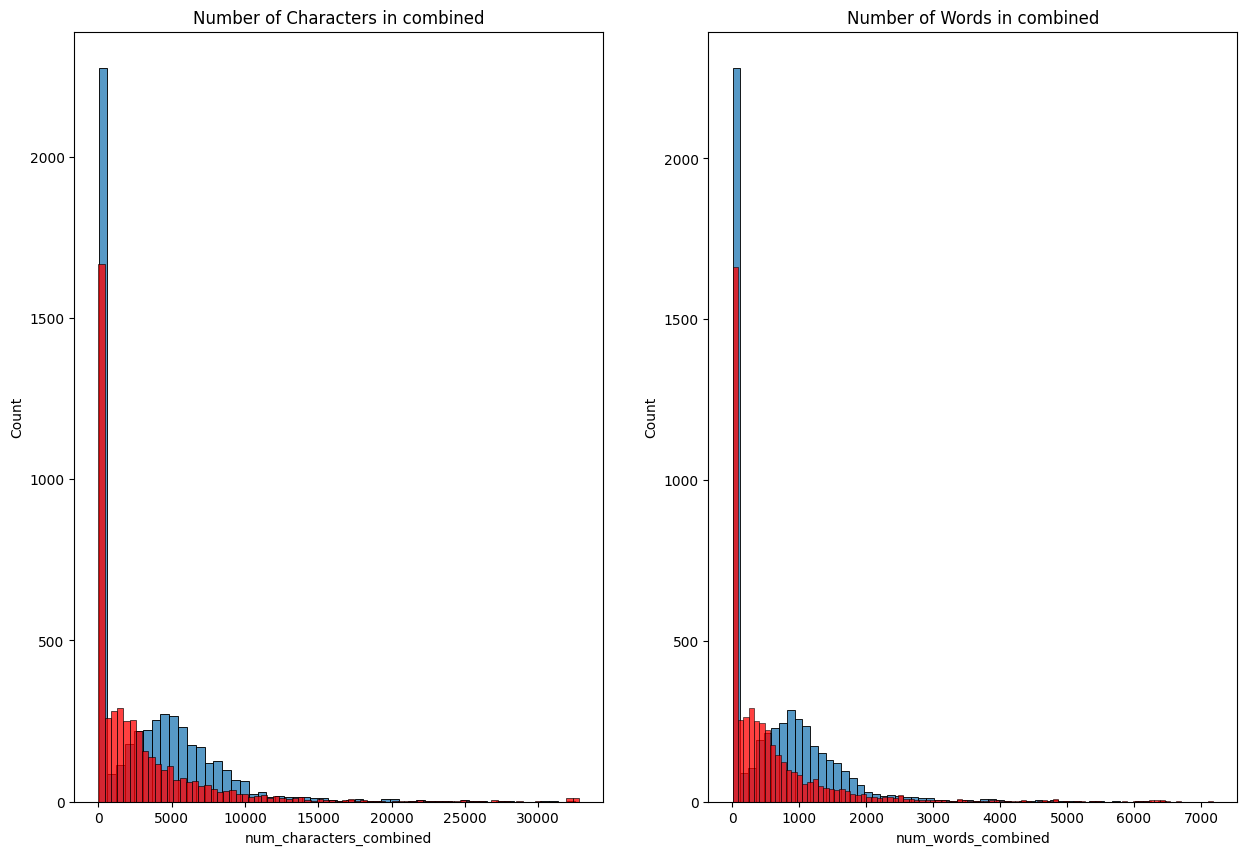

In [33]:
plt.figure(figsize=(15, 10))

# Plot for 'num_characters_combined'
plt.subplot(1, 2, 1)
sns.histplot(df[df['label'] == 1]['num_characters_combined'])
sns.histplot(df[df['label'] == 0]['num_characters_combined'], color='red')
plt.title('Number of Characters in combined')

# Plot for 'num_words_combined'
plt.subplot(1, 2, 2)
sns.histplot(df[df['label'] == 1]['num_words_combined'])
sns.histplot(df[df['label'] == 0]['num_words_combined'], color='red')
plt.title('Number of Words in combined')

plt.show()

**Generating Word Cloud**

In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [35]:
fake = wc.generate(df[df['label'] == 0]['combined'].str.cat(sep=" "))

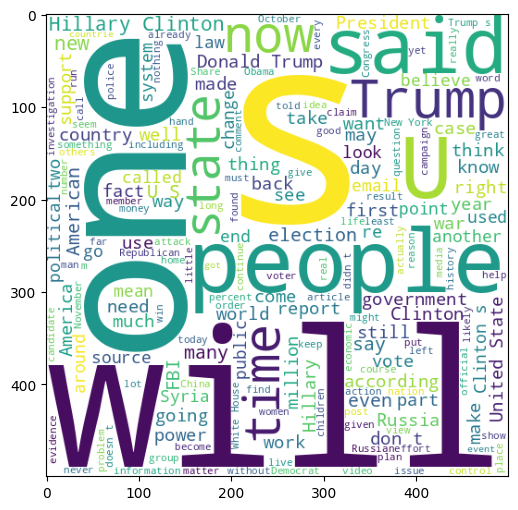

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(fake)

In [37]:
real = wc.generate(df[df['label'] == 1]['combined'].str.cat(sep=" "))

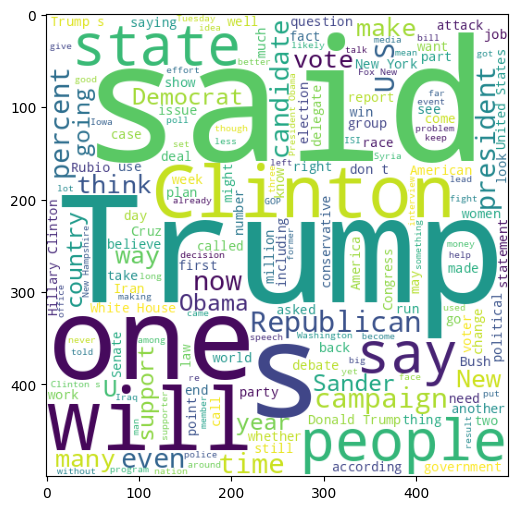

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(real)

Presentation of Word Cloud which word present mostly in fake and real news respectively

**Analysis of Title and Text of News Articles**

We define a preprocessing function that performs the following operations:

-> Converting text to lower case

-> Removing numbers from the text corpus

-> Removing punctuation from the text corpus

-> Removing special characters such as ‘<’, ‘…’ from the text corpus

-> Removing english stopwords

-> Stemming words to root words

-> Removing extra whitespaces from the text corpus

In [150]:
ps=PorterStemmer()
wst= WhitespaceTokenizer()

##### 1. Converting text to lower case
def lower_func (x):
    return x.lower()


##### 2. Removing Numbers from the text corpus
def remove_number_func (x):
    new=""
    for a in x:
        if a.isdigit()==False:
            new=new+a
    return new


##### 3. Removing punctuation
def remove_punc_func(x):
    new=''
    for a in x:
        if a not in string.punctuation:
            new=new+a
    return new

##### 4. Removing special characters
def remove_spec_char_func(x):
    new=''
    for a in x:
        if (a.isalnum()==True) or (a==' '):
            new=new+a
    return(new)

##### 5. Removing english stopwords
def remove_stopwords(x):
    new=[]
    for a in x.split():
        if a not in stopwords.words('english'):
            new.append(a)
    return " ".join(new)

##### 6. Stemming words to root words
def stem_func(x):
    wordlist = word_tokenize(x)
    psstem = [ps.stem(a) for a in wordlist]
    return ' '.join(psstem)

##### 7. Removing extra whitespaces
def remove_whitespace_func(x):
    return ' '.join(wst.tokenize(x))

def compose(f, g):
    return lambda x: f(g(x))

final=compose(compose(compose(compose(compose(compose(remove_whitespace_func,stem_func),remove_stopwords),remove_spec_char_func),remove_punc_func),remove_number_func),lower_func)

**Analysis of News Title**

We use 'final' function to process the title of news articles, then select the top 30 most frequent words in the news title for both categories i.e., real news and fake news. We plot the term frequency of these words in both categories.

In [40]:
# fake
df_fake=df[df['label']==0]

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
cv1 = CountVectorizer(analyzer=final)
cv1.fit(df_fake['title'])
bow1=cv1.transform(df_fake['title'])

In [43]:
pd.DataFrame(bow1.todense()).shape

(4634, 6788)

The line pd.DataFrame(bow1.todense()).shape is used to obtain the shape (number of rows and columns) of a dense representation of a bag-of-words (BoW) matrix represented by the variable bow1.

In [44]:
new1=[]
for x in range(0,6788):
    new1.append(cv1.get_feature_names_out()[x])

In [45]:
matrix1=pd.DataFrame(bow1.todense(),columns=new1)

In [46]:
sm1=[]
for x in new1:
    sm1.append(matrix1[x].sum())

In [47]:
trans1=matrix1.transpose()

In [48]:
trans1['sum']=sm1

In [49]:
top1=trans1.sort_values(by='sum', ascending=False).head(30)

In [50]:
# Real News
df_real=df[df['label']==1]

cv2 = CountVectorizer(analyzer=final)
cv2.fit(df_real['title'])
bow2=cv2.transform(df_real['title'])

pd.DataFrame(bow2.todense()).shape

(5148, 13707)

In [51]:
new2=[]
for x in range(0,13707):
    new2.append(cv2.get_feature_names_out()[x])

In [52]:
matrix2=pd.DataFrame(bow2.todense(),columns=new2)
sm2=[]
for x in new2:
    sm2.append(matrix2[x].sum())

trans2=matrix2.transpose()
trans2['sum']=sm2

top2=trans2.sort_values(by='sum', ascending=False).head(30)

In [53]:
top2

,0,1,2,3,4,5,6,7,8,9,...,5139,5140,5141,5142,5143,5144,5145,5146,5147,sum
trump,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,646
de,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,620
clinton,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,395
la,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,321
obama,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,292
gop,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,245
en,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,244
new,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,206
le,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,198
donald,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,190


In [54]:
# concatenation
top1.drop(list(range(0,4634)),axis=1,inplace=True)

In [55]:
top2.drop(list(range(0,5148)),axis=1,inplace=True)

In [56]:
top1['type']=['Fake']*30
top2['type']=['Real']*30

conc1=pd.concat([top1,top2])

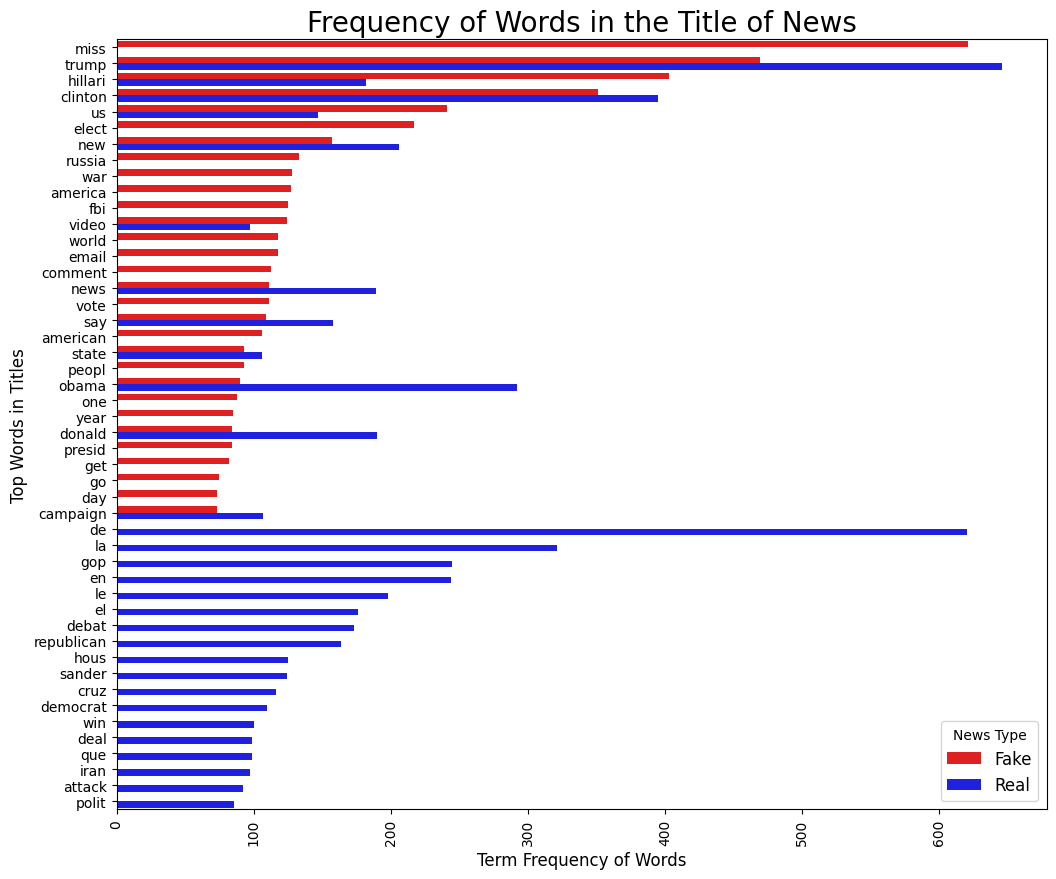

In [57]:
plt.figure(figsize=(12,10))
custom_palette = ['red', 'blue']
sns.barplot(y=conc1.index,x='sum',data=conc1,hue='type',palette=custom_palette)
plt.xticks(rotation=90)
plt.xlabel('Term Frequency of Words',fontsize=12)
plt.ylabel('Top Words in Titles',fontsize=12)
plt.legend(title='News Type',fontsize=12)
plt.title('Frequency of Words in the Title of News',fontsize=20)
plt.show()

The term frequency plot shows that some words like trump,video and obama are representative of the title of fake news whereas words like trump, us,say and hous are representative of the title of real news.

**Analysis of Title Length**

In [58]:
df['title_length']=df['title'].apply(lambda x: len(x))

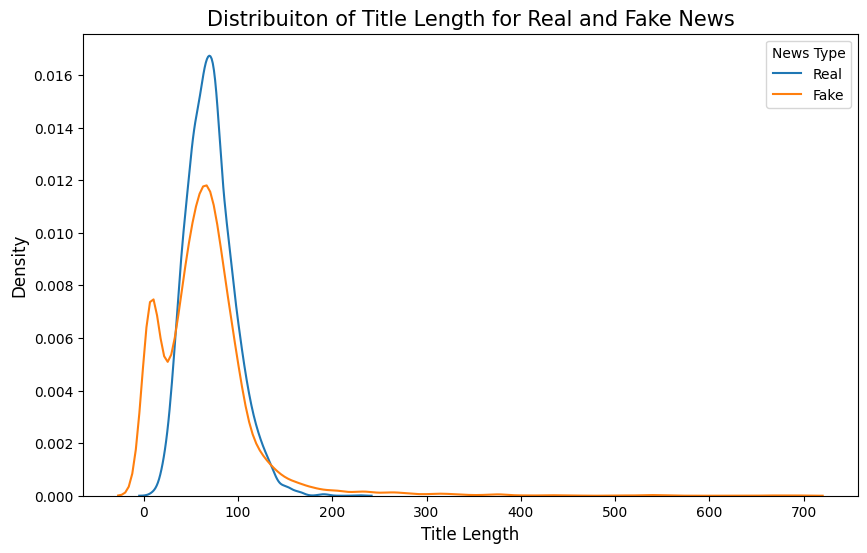

In [59]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['label']==1]['title_length'])
sns.kdeplot(df[df['label']==0]['title_length'])
plt.xlabel('Title Length',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.legend(title='News Type',fontsize=10,labels=['Real','Fake'])
plt.title('Distribuiton of Title Length for Real and Fake News',fontsize=15)
plt.show()

**Analysis of News Text**

We use 'final' function to process the title of news articles, then select the top 30 most frequent words in the news title for both categories i.e., real news and fake news. We plot the term frequency of these words in both categories.

In [60]:
# cv3 = CountVectorizer(analyzer=final)
# cv3.fit(df_fake['text'])
# bow3=cv3.transform(df_fake['text'])

# pd.DataFrame(bow3.todense()).shape

In [61]:
# new3=[]
# for x in range(0,48624):
#     new3.append(cv3.get_feature_names_out()[x])

In [62]:
# matrix3=pd.DataFrame(bow3.todense(),columns=new3)
# sm3=[]
# for x in new3:
#     sm3.append(matrix3[x].sum())

# trans3=matrix3.transpose()
# trans3['sum']=sm3

# top3=trans3.sort_values(by='sum', ascending=False).head(30)

**Analysis of Text Length**

In [63]:
df['text_length']=df['text'].apply(lambda x: len(x))

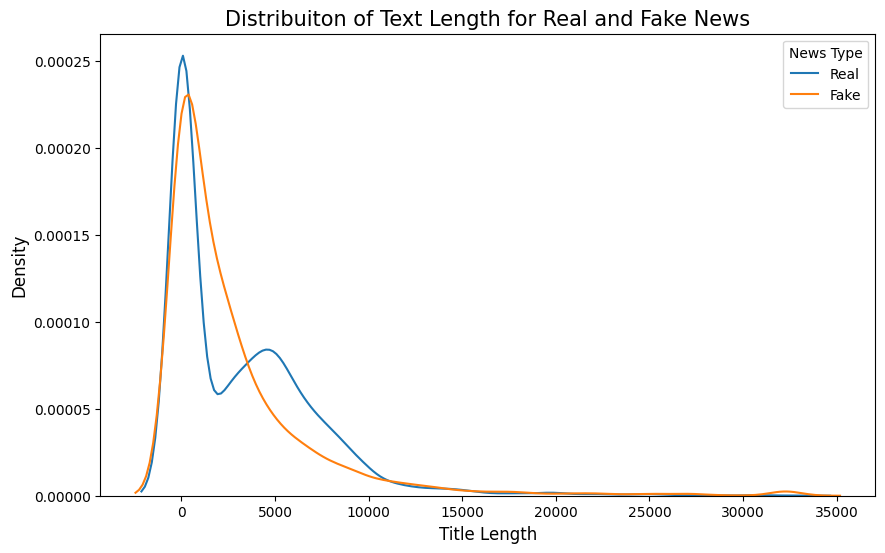

In [64]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['label']==1]['text_length'])
sns.kdeplot(df[df['label']==0]['text_length'])
plt.xlabel('Title Length',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.legend(title='News Type',fontsize=10,labels=['Real','Fake'])
plt.title('Distribuiton of Text Length for Real and Fake News',fontsize=15)
plt.show()

here we can see title length of real news is more than fake news , but text length is kind of same

**CLASSIFICATION**

**First - on News Text**

In [65]:
# splitting up data into training and test
X1=df['text']
y1=df['label']

In [66]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

1st - Random Forest Classifier with Text Preprocessing

In [67]:
from sklearn.ensemble import RandomForestClassifier
pp1=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [68]:
pp1.fit(X1_train,y1_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [69]:
predictions1=pp1.predict(X1_test)

In [70]:
print(confusion_matrix(y1_test, predictions1))
print('\n')
print(classification_report(y1_test, predictions1))

[[1123  317]
 [ 184 1311]]


              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1440
           1       0.81      0.88      0.84      1495

    accuracy                           0.83      2935
   macro avg       0.83      0.83      0.83      2935
weighted avg       0.83      0.83      0.83      2935



2nd - Random Forest Classifier without Text Pre-Processing

In [71]:
pp2=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [72]:
pp2.fit(X1_train,y1_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [73]:
predictions2=pp2.predict(X1_test)

print(confusion_matrix(y1_test, predictions2))
print('\n')
print(classification_report(y1_test, predictions2))

[[1113  327]
 [ 163 1332]]


              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1440
           1       0.80      0.89      0.84      1495

    accuracy                           0.83      2935
   macro avg       0.84      0.83      0.83      2935
weighted avg       0.84      0.83      0.83      2935



3rd -Naive Bayes with Text Preprocessing

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

**Multinomial NB**

In [75]:
pp3=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [76]:
pp3.fit(X1_train,y1_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [77]:
predictions3=pp3.predict(X1_test)

print(confusion_matrix(y1_test, predictions3))
print('\n')
print(classification_report(y1_test, predictions3))

[[ 777  663]
 [  41 1454]]


              precision    recall  f1-score   support

           0       0.95      0.54      0.69      1440
           1       0.69      0.97      0.81      1495

    accuracy                           0.76      2935
   macro avg       0.82      0.76      0.75      2935
weighted avg       0.82      0.76      0.75      2935



**Bernouli NB**

In [78]:
pp4=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',BernoulliNB())
    ])

In [79]:
pp4.fit(X1_train,y1_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()), ('classifier', BernoulliNB())])

In [80]:
predictions4=pp4.predict(X1_test)

print(confusion_matrix(y1_test, predictions4))
print('\n')
print(classification_report(y1_test, predictions4))

[[1361   79]
 [ 726  769]]


              precision    recall  f1-score   support

           0       0.65      0.95      0.77      1440
           1       0.91      0.51      0.66      1495

    accuracy                           0.73      2935
   macro avg       0.78      0.73      0.71      2935
weighted avg       0.78      0.73      0.71      2935



4th -Naive Bayes without Text Preprocessing

**Multinomial NB**

In [81]:
pp5=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [82]:
pp5.fit(X1_train,y1_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [83]:
predictions5=pp5.predict(X1_test)

print(confusion_matrix(y1_test, predictions5))
print('\n')
print(classification_report(y1_test, predictions5))

[[ 698  742]
 [  29 1466]]


              precision    recall  f1-score   support

           0       0.96      0.48      0.64      1440
           1       0.66      0.98      0.79      1495

    accuracy                           0.74      2935
   macro avg       0.81      0.73      0.72      2935
weighted avg       0.81      0.74      0.72      2935



**Bernouli NB**

In [84]:
pp6=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',BernoulliNB())
    ])

In [85]:
pp6.fit(X1_train,y1_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', BernoulliNB())])

In [86]:
predictions6=pp6.predict(X1_test)

print(confusion_matrix(y1_test, predictions6))
print('\n')
print(classification_report(y1_test, predictions6))

[[1283  157]
 [ 702  793]]


              precision    recall  f1-score   support

           0       0.65      0.89      0.75      1440
           1       0.83      0.53      0.65      1495

    accuracy                           0.71      2935
   macro avg       0.74      0.71      0.70      2935
weighted avg       0.74      0.71      0.70      2935



5th - Passive Aggresive Classifier with Text Pre-Processing

In [89]:
from sklearn.linear_model import PassiveAggressiveClassifier
pp7=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [90]:
pp7.fit(X1_train,y1_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [91]:
predictions7=pp7.predict(X1_test)

print(confusion_matrix(y1_test, predictions7))
print('\n')
print(classification_report(y1_test, predictions7))

[[1069  371]
 [ 122 1373]]


              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1440
           1       0.79      0.92      0.85      1495

    accuracy                           0.83      2935
   macro avg       0.84      0.83      0.83      2935
weighted avg       0.84      0.83      0.83      2935



6th - Passive Aggresive Classifier without Text Pre-Processing

In [92]:
pp8=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [93]:
pp8.fit(X1_train,y1_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [94]:
predictions8=pp8.predict(X1_test)

print(confusion_matrix(y1_test, predictions8))
print('\n')
print(classification_report(y1_test, predictions8))

[[1096  344]
 [ 110 1385]]


              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1440
           1       0.80      0.93      0.86      1495

    accuracy                           0.85      2935
   macro avg       0.85      0.84      0.84      2935
weighted avg       0.85      0.85      0.84      2935



**Second - on News Title**

In [95]:
# splitting up data into training and test
X2=df['title']
y2=df['label']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

1st - Random Forest with Text Pre-Processing

In [96]:
pp9=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [97]:
pp9.fit(X2_train,y2_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [98]:
predictions9=pp9.predict(X2_test)

print(confusion_matrix(y1_test, predictions9))
print('\n')
print(classification_report(y1_test, predictions9))

[[1240  200]
 [ 325 1170]]


              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1440
           1       0.85      0.78      0.82      1495

    accuracy                           0.82      2935
   macro avg       0.82      0.82      0.82      2935
weighted avg       0.82      0.82      0.82      2935



2nd - Random Forest without Text Pre-Processing


In [99]:
pp10=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [100]:
pp10.fit(X2_train,y2_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [101]:
predictions10=pp10.predict(X2_test)

print(confusion_matrix(y1_test, predictions10))
print('\n')
print(classification_report(y1_test, predictions10))


[[1268  172]
 [ 375 1120]]


              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1440
           1       0.87      0.75      0.80      1495

    accuracy                           0.81      2935
   macro avg       0.82      0.81      0.81      2935
weighted avg       0.82      0.81      0.81      2935



3rd - Naive Bayes with Text Pre-Processing

**Multinomial NB**

In [102]:
pp11=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [103]:
pp11.fit(X2_train,y2_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [104]:
predictions11=pp11.predict(X2_test)

print(confusion_matrix(y1_test, predictions11))
print('\n')
print(classification_report(y1_test, predictions11))


[[1191  249]
 [ 245 1250]]


              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1440
           1       0.83      0.84      0.84      1495

    accuracy                           0.83      2935
   macro avg       0.83      0.83      0.83      2935
weighted avg       0.83      0.83      0.83      2935



**Bernoulli NB**

In [105]:
pp12=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',BernoulliNB())
    ])

In [106]:
pp12.fit(X2_train,y2_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()), ('classifier', BernoulliNB())])

In [107]:
predictions12=pp12.predict(X2_test)

print(confusion_matrix(y1_test, predictions12))
print('\n')
print(classification_report(y1_test, predictions12))


[[1374   66]
 [ 514  981]]


              precision    recall  f1-score   support

           0       0.73      0.95      0.83      1440
           1       0.94      0.66      0.77      1495

    accuracy                           0.80      2935
   macro avg       0.83      0.81      0.80      2935
weighted avg       0.83      0.80      0.80      2935



4th - Naive Bayes without Text Pre-Processing

**Multinomial NB**

In [108]:
pp13=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [109]:
pp13.fit(X2_train,y2_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [110]:
predictions13=pp13.predict(X2_test)

print(confusion_matrix(y1_test, predictions13))
print('\n')
print(classification_report(y1_test, predictions13))


[[1259  181]
 [ 288 1207]]


              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1440
           1       0.87      0.81      0.84      1495

    accuracy                           0.84      2935
   macro avg       0.84      0.84      0.84      2935
weighted avg       0.84      0.84      0.84      2935



**Bernoulli NB**

In [111]:
pp14=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',BernoulliNB())
    ])


In [112]:
pp14.fit(X2_train,y2_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', BernoulliNB())])

In [113]:
predictions14=pp14.predict(X2_test)

print(confusion_matrix(y1_test, predictions14))
print('\n')
print(classification_report(y1_test, predictions14))


[[1348   92]
 [ 456 1039]]


              precision    recall  f1-score   support

           0       0.75      0.94      0.83      1440
           1       0.92      0.69      0.79      1495

    accuracy                           0.81      2935
   macro avg       0.83      0.82      0.81      2935
weighted avg       0.83      0.81      0.81      2935



5th - Passive Aggressive with Text Pre-Processing

In [114]:
pp15=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [115]:
pp15.fit(X2_train,y2_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [116]:
predictions15=pp15.predict(X2_test)

print(confusion_matrix(y1_test, predictions15))
print('\n')
print(classification_report(y1_test, predictions15))

[[1099  341]
 [ 282 1213]]


              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1440
           1       0.78      0.81      0.80      1495

    accuracy                           0.79      2935
   macro avg       0.79      0.79      0.79      2935
weighted avg       0.79      0.79      0.79      2935



6th - Passive Aggresive without Text Pre-Processing


In [117]:
pp16=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])


In [118]:
pp16.fit(X2_train,y2_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [119]:
predictions16=pp16.predict(X2_test)

print(confusion_matrix(y1_test, predictions16))
print('\n')
print(classification_report(y1_test, predictions16))

[[1165  275]
 [ 258 1237]]


              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1440
           1       0.82      0.83      0.82      1495

    accuracy                           0.82      2935
   macro avg       0.82      0.82      0.82      2935
weighted avg       0.82      0.82      0.82      2935



**Third - on News Text+Title=Combined**

In [120]:
# splitting up data into training and test
X3=df['combined']
y3=df['label']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

1st - Random Forest with Text Pre-Processing

In [121]:
pp17=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])


In [122]:
pp17.fit(X3_train,y3_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [123]:
predictions17=pp17.predict(X3_test)

print(confusion_matrix(y1_test, predictions17))
print('\n')
print(classification_report(y1_test, predictions17))


[[1366   74]
 [ 236 1259]]


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1440
           1       0.94      0.84      0.89      1495

    accuracy                           0.89      2935
   macro avg       0.90      0.90      0.89      2935
weighted avg       0.90      0.89      0.89      2935



2nd - Random Forest without Text Pre-Processing


In [124]:
pp18=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [125]:
pp18.fit(X3_train,y3_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [126]:
predictions18=pp18.predict(X3_test)

print(confusion_matrix(y1_test, predictions18))
print('\n')
print(classification_report(y1_test, predictions18))

[[1345   95]
 [ 158 1337]]


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1440
           1       0.93      0.89      0.91      1495

    accuracy                           0.91      2935
   macro avg       0.91      0.91      0.91      2935
weighted avg       0.91      0.91      0.91      2935



3rd - Naive Bayes with Text Pre-Processing

**Multinomial NB**

In [127]:
pp19=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [128]:
pp19.fit(X3_train,y3_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [129]:
predictions19=pp19.predict(X3_test)

print(confusion_matrix(y1_test, predictions19))
print('\n')
print(classification_report(y1_test, predictions19))

[[1087  353]
 [  67 1428]]


              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1440
           1       0.80      0.96      0.87      1495

    accuracy                           0.86      2935
   macro avg       0.87      0.86      0.85      2935
weighted avg       0.87      0.86      0.86      2935



**Bernoulli NB**

In [130]:
pp20=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',BernoulliNB())
    ])


In [131]:
pp20.fit(X3_train,y3_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()), ('classifier', BernoulliNB())])

In [132]:
predictions20=pp20.predict(X3_test)

print(confusion_matrix(y1_test, predictions20))
print('\n')
print(classification_report(y1_test, predictions20))

[[1371   69]
 [ 739  756]]


              precision    recall  f1-score   support

           0       0.65      0.95      0.77      1440
           1       0.92      0.51      0.65      1495

    accuracy                           0.72      2935
   macro avg       0.78      0.73      0.71      2935
weighted avg       0.79      0.72      0.71      2935



4th - Naive Bayes without Text Pre-Processing

**Multinomial NB**

In [133]:
pp21=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [134]:
pp21.fit(X3_train,y3_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [135]:
predictions21=pp21.predict(X3_test)

print(confusion_matrix(y1_test, predictions21))
print('\n')
print(classification_report(y1_test, predictions21))

[[1067  373]
 [  53 1442]]


              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1440
           1       0.79      0.96      0.87      1495

    accuracy                           0.85      2935
   macro avg       0.87      0.85      0.85      2935
weighted avg       0.87      0.85      0.85      2935



**Bernoulli NB**

In [136]:
pp22=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',BernoulliNB())
    ])

In [137]:
pp22.fit(X3_train,y3_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', BernoulliNB())])

In [138]:
predictions22=pp22.predict(X3_test)

print(confusion_matrix(y1_test, predictions22))
print('\n')
print(classification_report(y1_test, predictions22))

[[1305  135]
 [ 704  791]]


              precision    recall  f1-score   support

           0       0.65      0.91      0.76      1440
           1       0.85      0.53      0.65      1495

    accuracy                           0.71      2935
   macro avg       0.75      0.72      0.71      2935
weighted avg       0.75      0.71      0.70      2935



5th - Passive Aggresive with Text Pre-Processing

In [139]:
pp23=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])


In [140]:
pp23.fit(X3_train,y3_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7aaecc725240>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [141]:
predictions23=pp23.predict(X3_test)

print(confusion_matrix(y1_test, predictions23))
print('\n')
print(classification_report(y1_test, predictions23))

[[1274  166]
 [ 127 1368]]


              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1440
           1       0.89      0.92      0.90      1495

    accuracy                           0.90      2935
   macro avg       0.90      0.90      0.90      2935
weighted avg       0.90      0.90      0.90      2935



6th - Passive Aggresive without Text Pre-Processing

In [142]:
pp24=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])


In [143]:
pp24.fit(X3_train,y3_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [144]:
predictions24=pp24.predict(X3_test)

print(confusion_matrix(y1_test, predictions24))
print('\n')
print(classification_report(y1_test, predictions24))

[[1315  125]
 [ 109 1386]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1440
           1       0.92      0.93      0.92      1495

    accuracy                           0.92      2935
   macro avg       0.92      0.92      0.92      2935
weighted avg       0.92      0.92      0.92      2935



**Accuracy of all 24 models in one glance**

In [145]:
print('Text_Random Forest Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions1)))
print('Text_Random Forest Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions2)))

print('Text_Naive Bayes(MNB) Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions3)))
print('Text_Naive Bayes(BNB) Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions4)))
print('Text_Naive Bayes(MNB) Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions5)))
print('Text_Naive Bayes(BNB) Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions6)))

print('Text_Passive Aggressive Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions7)))
print('Text_Passive Aggressive Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions8)))

print('\n')

print('Title_Random Forest Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions9)))
print('Title_Random Forest Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions10)))

print('Title_Naive Bayes(MNB) Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions11)))
print('Title_Naive Bayes(BNB) Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions12)))
print('Title_Naive Bayes(MNB) Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions13)))
print('Title_Naive Bayes(BNB) Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions14)))

print('Title_Passive Aggressive Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions15)))
print('Title_Passive Aggressive Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions16)))

print('\n')

print('Combined_Random Forest Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions17)))
print('Combined_Random Forest Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions18)))

print('Combined_Naive Bayes(MNB) Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions19)))
print('Combined_Naive Bayes(BNB) Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions20)))
print('Combined_Naive Bayes(MNB) Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions21)))
print('Combined_Naive Bayes(BNB) Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions22)))

print('Combined_Passive Aggressive Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions23)))
print('Combined_Passive Aggressive Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions24)))

Text_Random Forest Classifier_With Text Preprocessing:  83
Text_Random Forest Classifier_Without Text Preprocessing:  83
Text_Naive Bayes(MNB) Classifier_With Text Preprocessing:  76
Text_Naive Bayes(BNB) Classifier_With Text Preprocessing:  73
Text_Naive Bayes(MNB) Classifier_Without Text Preprocessing:  74
Text_Naive Bayes(BNB) Classifier_Without Text Preprocessing:  71
Text_Passive Aggressive Classifier_With Text Preprocessing:  83
Text_Passive Aggressive Classifier_Without Text Preprocessing:  85


Title_Random Forest Classifier_With Text Preprocessing:  82
Title_Random Forest Classifier_Without Text Preprocessing:  81
Title_Naive Bayes(MNB) Classifier_With Text Preprocessing:  83
Title_Naive Bayes(BNB) Classifier_With Text Preprocessing:  80
Title_Naive Bayes(MNB) Classifier_Without Text Preprocessing:  84
Title_Naive Bayes(BNB) Classifier_Without Text Preprocessing:  81
Title_Passive Aggressive Classifier_With Text Preprocessing:  79
Title_Passive Aggressive Classifier_Without Te

Here we get the maximum accuracy as 92% on Combined with Passive Aggresive Classifier model, so we will save that and use it further

**Saving and Testing**

In [146]:
import pickle
pickle.dump(pp24,open('model.pkl','wb'))

In [147]:
model = pickle.load(open('model.pkl','rb'))

In [164]:
import re
import string
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    porter = PorterStemmer()
    stemmed_tokens = [porter.stem(word) for word in filtered_tokens]

    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

def predict_news_authenticity(news_text):

    preprocessed_news_text = preprocess_text(news_text)
    prediction = pp24.predict([preprocessed_news_text])

    if prediction == 0:
        return "Fake"
    else:
        return "Real"

In [163]:
user_input = input("Enter the news text: ")
result = predict_news_authenticity(user_input)
print("The news is:", result)

Enter the news text: Folks, I work hard to be the common sense voice for YOU in a growingly crazy America.  We are taking inÂ thousands of refugees from Muslim countries without any idea who they are or what their motives are.  A serial sniperâ€™s been Â shooting at vehicles in Arizona.  Caitlyn Jenner is considered a hero, yet, the cops who risk their lives for us are being gunned down in the streets.  The country is upside down.  But thereâ€™s one issue I have to highlight here in wake up America because it threatens our very republic.  Itâ€™s the Iran nuclear deal.. and itâ€™s a deadly mistake we are making.  This is no right wing. Left wing manufactured fight. This is for real folks -- lives will be lost if we lift Iranian sanctions. Period.  Handing over an initial $100 billion to the regime that sponsors terror around the world is insane!  Then allowing them to sell another $100 billion per year in oil is equally insane.  That as they telegraph their hatred for us makes zero sens